In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Load data

In [2]:
expression_df = pd.read_csv('data/GSE104878_20170811_average_promoter_ELs_per_seq_OLS_Glu_goodCores_ALL.txt.gz', sep="\t")
scaffold_sequences = pd.read_csv('data/GSE104878_Scaffold_library_sequences.txt.gz', sep="\t")

Check that dfs look correct.

In [3]:
scaffold_sequences.head()

,ScaffoldName,DesignedSequence
0,YAL001C,CTAATCAAGTGCTAGCTGTGACAAGACTTAAATCATTACATAAAAG...
1,YAL003W,CTAATCAAGTGCTAGCGCACACGTGCTTTATTTCTTTTTCTGAATT...
2,YAL005C,CTAATCAAGTGCTAGCTCTAGAAAGAAAGCACACGGAACGTTTAGA...
3,YAL007C,CTAATCAAGTGCTAGCACTTTAAATAATATTACAAATTGCTACAGC...
4,YAL008W,CTAATCAAGTGCTAGCCCAGGGAAGGTGCTAGAAGACGCAAACAAG...


In [4]:
expression_df.head()

,ScaffoldID,ObservedSequence,Expression,ScaffoldName,ScaffoldType
0,2,CTAATCAAGTGCTAGCAAAAAAAAAAAAAAAGAAAAAAAATATATA...,3.751825,YMR038C,native
1,2,CTAATCAAGTGCTAGCAAAAAAAAAAAAAGAAAAAAAATATATACT...,4.455292,YMR038C,native
2,2,CTAATCAAGTGCTAGCAAAAAAAAAAAAAAAGAAATAAAAATATAT...,3.751825,YMR038C,native
3,2,CTAATCAAGTGCTAGCAAAAAAAAAAAAAAAGAAATAAAAATATAT...,4.455292,YMR038C,native
4,2,CTAATCAAGTGCTAGCAAAAAAAAAAAAAAAGAAATAAAAATATAT...,3.751825,YMR038C,native


Group by scaffold name and calculate statistics.

In [5]:
def f(df):
  return pd.Series({
    'mean': np.mean(df['Expression']),
    'stdev': np.std(df['Expression']),
    'reads': len(df['Expression']),
  })

grouped = expression_df.groupby('ScaffoldName').apply(f)
grouped.head()

,mean,stdev,reads
ScaffoldName,,,
Blank_0,0.943999,1.010541,2335.0
Blank_1,1.579654,1.291183,1669.0
Blank_2,1.596434,1.105018,969.0
Blank_3,1.640840,1.213817,4219.0
Blank_4,1.666120,1.280006,1323.0


Merge to include designed scaffold sequence.

In [6]:
grouped = grouped.merge(scaffold_sequences, on='ScaffoldName')
grouped.head()

,ScaffoldName,mean,stdev,reads,DesignedSequence
0,Blank_0,0.943999,1.010541,2335.0,CTAATCAAGTGCTAGCCTTGCCCTCACGTGGCATCCGATGGATTAC...
1,Blank_1,1.579654,1.291183,1669.0,CTAATCAAGTGCTAGCAAGTAGTTCAGGCCAATGCTATCCATACTA...
2,Blank_2,1.596434,1.105018,969.0,CTAATCAAGTGCTAGCCCCCTTACCAGGAACCACCTGATGAATTGT...
3,Blank_3,1.640840,1.213817,4219.0,CTAATCAAGTGCTAGCTTTTCAGTACGAATTTGGGTTAGAAACGGG...
4,Blank_4,1.666120,1.280006,1323.0,CTAATCAAGTGCTAGCTGTCCTGACACCTTCGGTGGATTGACACTA...


<AxesSubplot:xlabel='mean', ylabel='stdev'>

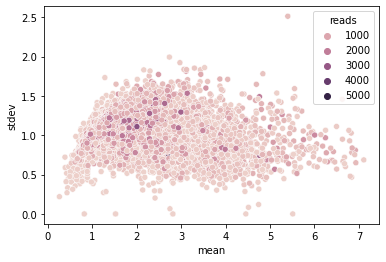

In [7]:
sns.scatterplot(data=grouped, x='mean', y='stdev', hue='reads')

We ideally want something with both high mean expression for a strong signal, but also high standard deviation so that the effect of only a few mutations in the random promoter region can be measured. Choose anything with a mean > 5, then sort by standard deviation.

In [8]:
high_mean_sorted_stddev = grouped[(grouped['mean'] > 5) & (grouped['reads'] > 200)].sort_values('stdev', ascending=False)

In [9]:
high_stdev_names= high_mean_sorted_stddev['ScaffoldName'][:20]

In [10]:
high_mean_sorted_stddev[:20]

,ScaffoldName,mean,stdev,reads,DesignedSequence
8427,YPL187W,5.399267,2.511855,452.0,CTAATCAAGTGCTAGCACATCTGTATTCCTTTTTTTTATGAACACC...
6823,YLR061W,5.551104,1.591931,304.0,CTAATCAAGTGCTAGCTACTACCGCTACTGAGTAAATGTTTAGCTT...
4263,YCR005C,5.519091,1.470494,255.0,CTAATCAAGTGCTAGCGAAGAGGTCACGACCTATTTTTTCTTGCAG...
4258,YCL064C,5.246384,1.418914,226.0,CTAATCAAGTGCTAGCTTCCTACTATTTTTCTTTTTCTCTTTTCGC...
4456,YDL136W,5.012820,1.391879,809.0,CTAATCAAGTGCTAGCCCACTACTATATGAAAAAATGAAAAGAGGC...
3968,YBR010W,5.047443,1.372582,519.0,CTAATCAAGTGCTAGCCGGGGAGATACAAAAAAGATTTTTGCTCTC...
7832,YNR067C,5.566307,1.337148,242.0,CTAATCAAGTGCTAGCTTGTTACCGAGTTCAGCTGCGCTAAGCTCT...
7046,YLR355C,5.611197,1.330533,352.0,CTAATCAAGTGCTAGCCGGTTCTGCCACCTCCAATAGAGCTCAGTA...
6902,YLR167W,5.714055,1.306484,553.0,CTAATCAAGTGCTAGCAATAGTGGTGAAGTCTTTAGTGCGATCTAC...
7316,YMR102C,5.165381,1.304632,616.0,CTAATCAAGTGCTAGCGAGCAGCTTATTTCTTCCGCGGATGATCCT...


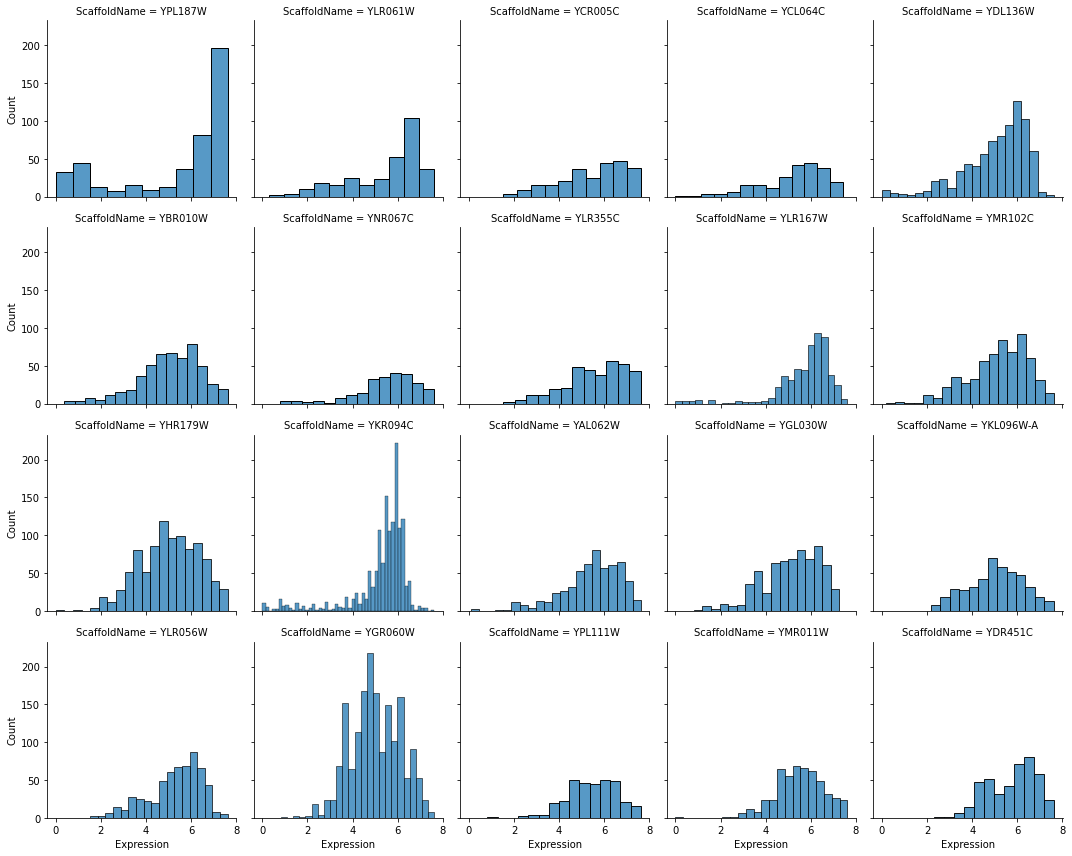

In [11]:
g = sns.FacetGrid(expression_df, col="ScaffoldName", col_order=high_stdev_names, col_wrap=5)
g.map(sns.histplot, "Expression")

It looks like all of the high expression scaffolds are from the yeast genome. The one outlier with very high stdev (YPL187W) has bimodal expression so this would be a bad choice. YBR010W distribution looks good; it is the promoter for histone H3, which seems like a good choice (housekeeping gene). Get the full promoter sequence:

In [12]:
grouped[grouped["ScaffoldName"] == "YBR010W"]['DesignedSequence'].item()

'CTAATCAAGTGCTAGCCGGGGAGATACAAAAAAGATTTTTGCTCTCGTTCTCACATTTTCGCATTGTCCCATACATTATCGTTCTCACAATTTCTCACATTTCCTTGCTCTGCACCTTTCTCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCTAGGCTTGTTGAAATACATATATAAAAGACTGTGTATTCTTCGGGATACATCTCTTTCCTCAACCTTTTATATTGGATCCTGAGCAG'

array([[<AxesSubplot:title={'center':'Expression'}>]], dtype=object)

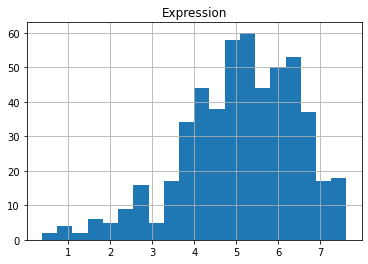

In [13]:
expression_df[expression_df["ScaffoldName"] == "YBR010W"].hist("Expression", bins=20)

BLASTed the sequence and it matches the HHT1 (histone H3) promoter.

Using a native yeast promoter for the scaffold could potentially lead to recombination or some other issue we haven't thought about, so we'll also use a random promoter scaffold. Find the random promoter scaffolds with mean expression > 4 and sort by standard deviation:

In [14]:
high_mean_sorted_stddev_random = grouped[(grouped['mean'] > 4) & (grouped['reads'] > 200) & (grouped['ScaffoldName'].astype(str).str[:4] == 'Pure')].sort_values('stdev', ascending=False)

In [15]:
high_mean_sorted_stddev_random[:20]

,ScaffoldName,mean,stdev,reads,DesignedSequence
3262,PureRand501,4.441250,1.154499,650.0,CTAATCAAGTGCTAGCCCTTAGATCATTTATCAGGAATTGCGGCAA...
1699,PureRand2536,4.439103,1.149573,492.0,CTAATCAAGTGCTAGCCCGCAATTTTCTGTTTATTTACTACTCATA...
481,PureRand143,4.229624,1.074104,687.0,CTAATCAAGTGCTAGCACATTACGTAGTAGAGCCATTTGGTCTCTC...
2583,PureRand3339,4.174636,1.062666,828.0,CTAATCAAGTGCTAGCCCCATCAGGTATTAGAGTCGCTTGCTTACC...
602,PureRand154,4.081721,0.994539,561.0,CTAATCAAGTGCTAGCCACCGCACTAAAAATGTCGGCACTCCGGCT...
2869,PureRand3598,4.022757,0.912212,258.0,CTAATCAAGTGCTAGCGAGCACGTACGAATCTGAGGTCATATTCTC...
3199,PureRand445,4.100991,0.836775,394.0,CTAATCAAGTGCTAGCTCTTCTTGAGTGATATATCATTCCATACTC...
2323,PureRand3100,4.377717,0.824651,390.0,CTAATCAAGTGCTAGCTGAAATTTTATCTTGTTTTCATTAAACTTC...
384,PureRand1341,4.005374,0.777830,307.0,CTAATCAAGTGCTAGCATCTTCGGTTTCCATTCAAATCGGGTTATG...
3368,PureRand599,4.806975,0.768238,283.0,CTAATCAAGTGCTAGCACAGACTGGCAGAAGCCCTTAAAATTTTAA...


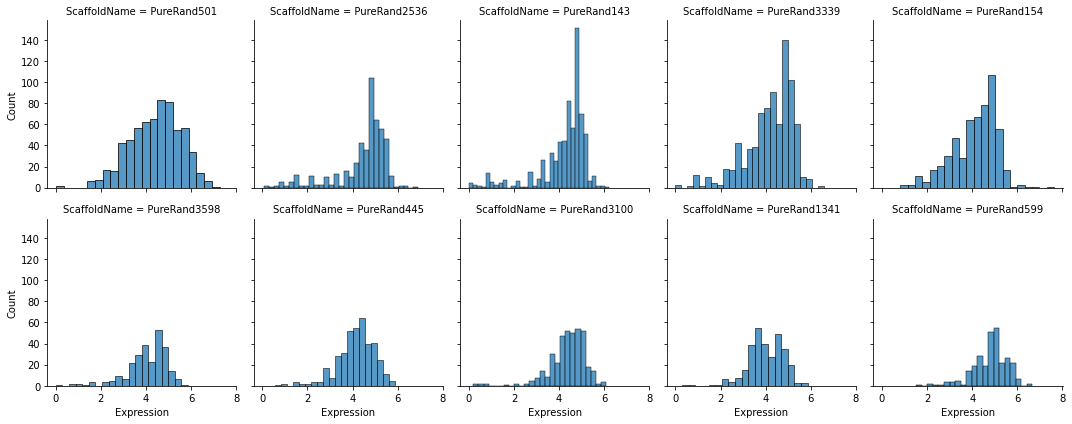

In [16]:
random_names = high_mean_sorted_stddev_random['ScaffoldName'][:20]
g = sns.FacetGrid(expression_df, col="ScaffoldName", col_order=random_names, col_wrap=5)
g.map(sns.histplot, "Expression")

PureRand501 looks like the best tradeoff between mean and stdev and it has a relatively symmetric distribution. Get the full scaffold sequence:

In [17]:
grouped[grouped["ScaffoldName"] == "PureRand501"]['DesignedSequence'].item()

'CTAATCAAGTGCTAGCCCTTAGATCATTTATCAGGAATTGCGGCAAAGTATAATTTTTTCACTACTAAAACAGATAAGGAATACGCGAAAACCGTGTGATAAGGCAACCTGTGCGCGTTCTCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCTAGGGTGGGATCATACATACATAAACCTACAAGAGATTCGCATTCATGCTGAAAAAACATTGTTAAACGTCCAAGGATCCTGAGCAG'

array([[<AxesSubplot:title={'center':'Expression'}>]], dtype=object)

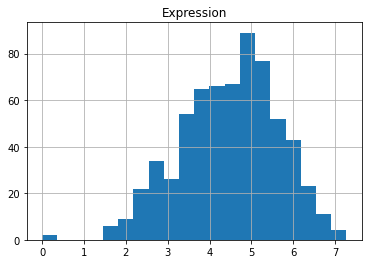

In [18]:
expression_df[expression_df["ScaffoldName"] == "PureRand501"].hist("Expression", bins=20)